In [2]:
import numpy as np
import matplotlib.pyplot
from matplotlib.pyplot import imshow
import scipy.special as scipy
from PIL import Image
import codecs, json 

class NeuralNetwork(object):
    def __init__(self):
        self.input_neuron_count = 28*28 # One for each pixel, 28*28 = 784 in total.
        self.hidden_neuron_count = 100 # Arbitraty.
        self.output_neuron_count = 10 # One for each digit from 0 to 9.
        self.learning_rate = 0.1 # Arbitraty.

        # Sampling the weights from a normal probability distribution
        # centered around zero and with standard deviation 
        # that is related to the number of incoming links into a node,
        # 1/√(number of incoming links).
        generate_random_weight_matrix = lambda input_neuron_count, output_neuron_count: ( 
            np.random.normal(0.0,  pow(input_neuron_count, -0.5), (input_neuron_count, output_neuron_count))
        )

        self.input_x_hidden_weights = generate_random_weight_matrix(self.input_neuron_count, self.hidden_neuron_count)
        self.hidden_x_output_weights = generate_random_weight_matrix(self.hidden_neuron_count, self.output_neuron_count)

        self.activation_function = lambda value: scipy.expit(value) # Sigmoid function

    def train(self, input_array, target_array):
        inputs = np.array(input_array, ndmin=2)
        targets = np.array(target_array, ndmin=2)

        hidden_layer_input = np.dot(inputs, self.input_x_hidden_weights)
        hidden_layer_output = self.activation_function(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.hidden_x_output_weights)
        output_layer_output = self.activation_function(output_layer_input)

        output_errors = targets - output_layer_output
        self.hidden_x_output_weights += self.learning_rate * np.dot(hidden_layer_output.T, (output_errors * output_layer_output * (1 - output_layer_output)))

        hidden_errors = np.dot(output_errors, self.hidden_x_output_weights.T)
        self.input_x_hidden_weights += self.learning_rate * np.dot(inputs.T, (hidden_errors * hidden_layer_output * (1 - hidden_layer_output)))

    def query(self, input_array):
        inputs = np.array(input_array, ndmin=2)

        hidden_layer_input = np.dot(inputs, self.input_x_hidden_weights)
        hidden_layer_output = self.activation_function(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.hidden_x_output_weights)
        output_layer_output = self.activation_function(output_layer_input)

        return output_layer_output
    
    def export(self):
        input_x_hidden_weights = self.input_x_hidden_weights.tolist()
        json.dump(input_x_hidden_weights, codecs.open('input_x_hidden_weights.json', 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)
        hidden_x_output_weights = self.hidden_x_output_weights.tolist()
        json.dump(hidden_x_output_weights, codecs.open('hidden_x_output_weights.json', 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)
    
def prepare_data(handwritten_digit_array):
    return ((handwritten_digit_array / 255.0 * 0.99) + 0.0001).flatten()
    
def create_target(digit_target):
    target = np.zeros(10) + 0.01
    target[digit_target] = target[digit_target] + 0.98
    return target

def get_index_of_max(array):
    array = array[0]
    index = 0
    m = max(array)
    for n in array:
        if n == m:
            return index
        index = index + 1

# Training
neural_network = NeuralNetwork()
training_data_file = open('mnist_train.csv', 'r')
training_data = training_data_file.readlines()
training_data_file.close()

# Training / First epoch
for data in training_data:
    handwritten_digit_raw = data.split(',')
    handwritten_digit_array = np.asfarray(handwritten_digit_raw[1:]).reshape((28, 28))
    handwritten_digit_target = int(handwritten_digit_raw[0])
    neural_network.train(prepare_data(handwritten_digit_array), create_target(handwritten_digit_target))

# Training / Second epoch
for data in training_data:
    handwritten_digit_raw = data.split(',')
    handwritten_digit_array = np.asfarray(handwritten_digit_raw[1:]).reshape((28, 28))
    handwritten_digit_target = int(handwritten_digit_raw[0])
    neural_network.train(prepare_data(handwritten_digit_array), create_target(handwritten_digit_target))
    
# Testing
test_data_file = open('mnist_test.csv', 'r')
test_data = test_data_file.readlines()
test_data_file.close()

test_count = 0
hit_count = 0
miss_count =0
for data in test_data:
    #np.set_printoptions(precision=4, threshold=10000)
    handwritten_digit_raw = data.split(',')
    handwritten_digit_array = np.asfarray(handwritten_digit_raw[1:]).reshape((28, 28))
    handwritten_digit_target = int(handwritten_digit_raw[0])
    output = neural_network.query(handwritten_digit_array.flatten())
    
    hit_or_miss = get_index_of_max(output)
    if hit_or_miss == handwritten_digit_target:
        hit_count = hit_count + 1
    else:
        miss_count = miss_count + 1
    test_count = test_count + 1
    
print("test_count", test_count)
print("hit_count", hit_count)
print("miss_count", miss_count)
print("hit ratio", hit_count/test_count * 100)

neural_network.export();

test_count 10000
hit_count 9553
miss_count 447
hit ratio 95.53


[[  4.3066e-03   1.2250e-02   1.6254e-03   9.8859e-01   1.6573e-02
    1.0645e-02   2.7040e-04   3.1279e-03   6.7723e-03   3.8612e-03]]
3


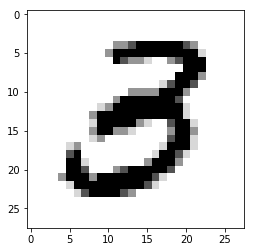

In [36]:
# Previe of test image and result of recognition
%matplotlib inline  
test_image_index = 7040
test_data_file = open('mnist_test.csv', 'r')
test_data = test_data_file.readlines()
test_data_file.close()
data = test_data[test_image_index]
handwritten_digit_raw = data.split(',')
handwritten_digit_array = np.asfarray(handwritten_digit_raw[1:]).reshape((28, 28))
handwritten_digit_target = int(handwritten_digit_raw[0])
matplotlib.pyplot.imshow(handwritten_digit_array, cmap='Greys', interpolation='None')
output = neural_network.query(handwritten_digit_array.flatten())
print(output)
print(get_index_of_max(output))